# Data Science & Business Analytics Internship - The Sparks Foundation
## Author- Priyansh Saxena

### Task-1 - Prediction Using Supervised Machine Learning

### Aim- Predict the percentage of an student based on the no. of study hours(9.25).

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline

# Importing the dataset

In [2]:
# Reading data 
path = "http://bit.ly/w-data" #url for the dataset
data = pd.read_csv(path)      #using pandas
print("Data imported successfully")
data.head() #printing out the first 5 entries

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.tail() #printing last 5 values of the dataset

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
#Verfying for null values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## 0 null values found

In [5]:
data.info() #Print information of our dataset
data.shape #Printing dimensions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


(25, 2)

In [6]:
#using describe() method to see mean,percentiles,max,min,std deviation,count of the given dataset.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the dataset

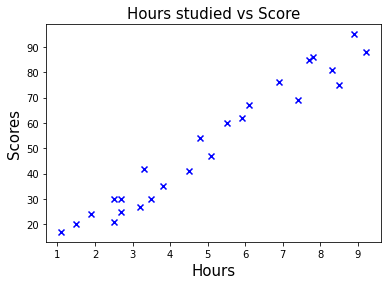

In [7]:
#Scatter plot
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.title('Hours studied vs Score', fontsize = 15)
plt.scatter(data.Hours,data.Scores, color='blue', marker='x')
plt.show()

### Positive linear relation between the number of hours studied and percentage of score is indicated by scatter plot

# Preparing the data for algorithm

In [8]:
# dividing data into inputs and outputs (attributes and labels)
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [9]:
# splitting data into test and training sets. 
# this will bbe done train_test_split() method:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Algorithm

In [10]:
reg = LinearRegression() # using sklearn.linear_model
reg.fit(X_train, y_train)
print("Done")

Done


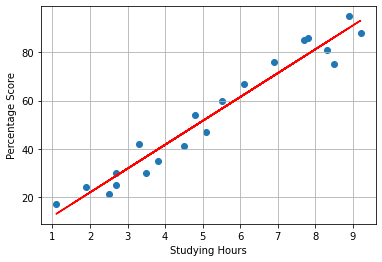

In [11]:
# Plotting regression line
line = reg.coef_*X + reg.intercept_
plt.scatter(X_train, y_train)
plt.plot(X, line, color = 'red')
plt.xlabel('Studying Hours')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

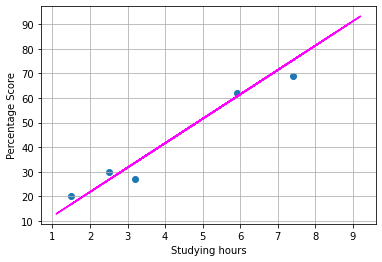

In [12]:
plt.scatter(X_test, y_test)
plt.plot(X, line, color = 'magenta')
plt.xlabel('Studying hours')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

# Predicting

In [13]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
# Actual Vs Predicted
compare_scores = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
compare_scores

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
# testing accuracy 
from sklearn import metrics
print('actual and predicted r-squared accuracy:', metrics.r2_score(y_test, y_pred))

actual and predicted r-squared accuracy: 0.9454906892105354


### Model is good

In [16]:
# Evaluating the model
meanse = metrics.mean_squared_error(y_test, y_pred)
rootmeanse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
meansabse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("The mean squared error = ",meanse)
print("The root mean squared error = ",rootmeanse)
print("The mean absolute error = ",meansabse)

The mean squared error =  21.598769307217456
The root mean squared error =  4.647447612100373
The mean absolute error =  4.647447612100373


### Since the value of Mean absolute error is less therfore the chances of error or wrong forecasting through the model are very less

# Predicted score of a student who studies for 9.25 hrs/day

In [17]:
hours = [9.25]
result = reg.predict([hours])
print("Predicted Score = {}".format(round(result[0],2)))

Predicted Score = 93.69


## Therefore, According to model if a student studies 9.25 hours a day he/she is likely to score 93.69 marks